#第12章　ニューラルネットワーク

##12.3　ニューラルネットワークによる回帰問題

Train data shape: (16512, 8)
Test data shape: (4128, 8)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_22 (Dense)                     │ (None, 64)                  │             576 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_24 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,689 (10.50 KB)

 Trainable params: 2,689 (10.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 3688.8811 - mse: 3688.8811 - val_loss: 2.1219 - val_mse: 2.1219
Epoch 2/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 2.2661 - mse: 2.2661 - val_loss: 1.9187 - val_mse: 1.9187
Epoch 3/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 1.6936 - mse: 1.6936 - val_loss: 1.7626 - val_mse: 1.7626
Epoch 4/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 1.4508 - mse: 1.4508 - val_loss: 1.5101 - val_mse: 1.5101
Epoch 5/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 1.3768 - mse: 1.3768 - val_loss: 1.6584 - val_mse: 1.6584
Epoch 6/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 1.2978 - mse: 1.2978 - val_loss: 2.2645 - val_mse: 2.2645
Epoch 7/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 1.0675 - mse: 1.0675 - val_loss: 1.2006 - val_mse: 1.2006
Epoch 8/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2.0790 - mse: 2.0790 - val_loss: 1.5305 - val_mse: 1.5305
Epoch 9/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/ste

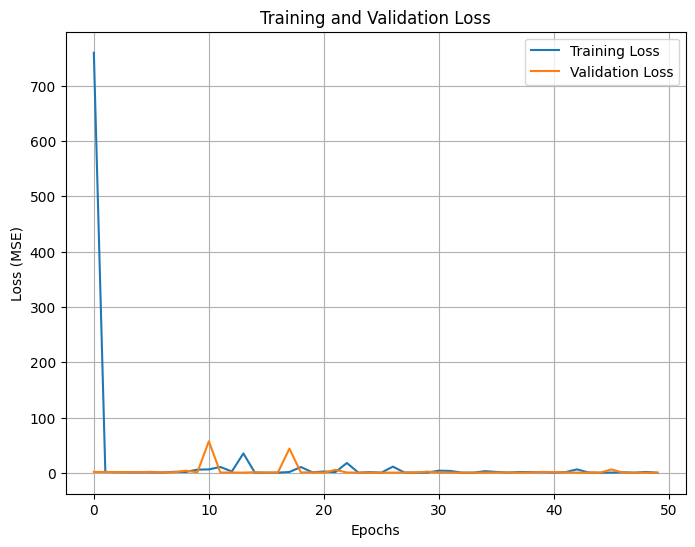

516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
RMSE　訓練時: 0.763　評価時:0.770


In [8]:
import numpy as np
import pandas as pd

#手順1　データの読み込み
from sklearn.datasets import fetch_california_housing

# データのロード
california = fetch_california_housing()
X, y = california.data, california.target

#手順2　データの前処理
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# データの分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)
# 特徴量の標準化
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)
#訓練データとテストデータの形状
print(f"Train data shape: {X_train_std.shape}")
print(f"Test data shape: {X_test_std.shape}" )

#手順3　モデルの指定
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Input

#モデルの定義
model = Sequential([
    Input(shape=X_train.shape[1:]),# 入力層 +
    Dense(64, activation="relu"),  # 隠れ層1
    Dense(32, activation="relu"),  # 隠れ層2
    Dense(1,activation="linear")   # 出力層
])

# モデルの概要を表示
model.summary()
#モデルのコンパイル
#最適化関数はadam、損失関数はmse、性能に指標はmaeを指定した
model.compile(optimizer="adam", loss="mse", metrics=["mse"])

#手順4　モデルの訓練
history = model.fit(
    X_train, y_train,
    validation_split=0.2,  # トレーニングデータの20%を検証データとして使用
    epochs=50,            # エポック数
    batch_size=32,        # バッチサイズ
    verbose=1             # 学習プロセスを表示
)

#モデル訓練の状況を折れ線グラフで表す
import matplotlib.pyplot as plt
# 損失のプロット
plt.figure(figsize=(8, 6))
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss (MSE)")
plt.title("Training and Validation Loss")
plt.legend()
plt.grid(True)
plt.show()
plt.close()

#手順5　モデルで予測
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

#手順6　モデルの評価
#MSEで評価する場合
from sklearn.metrics import mean_squared_error
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test =  np.sqrt(mean_squared_error(y_test, y_test_pred))
print(f"RMSE　訓練時: {rmse_train:.3f}　評価時:{rmse_test:.3f}")



##12.4　ニューラルネットワークによる二値分類問題

Epoch 1/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7417 - loss: 0.5692 - val_accuracy: 0.9121 - val_loss: 0.3911
Epoch 2/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9114 - loss: 0.3843 - val_accuracy: 0.9670 - val_loss: 0.2480
Epoch 3/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9455 - loss: 0.2539 - val_accuracy: 0.9670 - val_loss: 0.1674
Epoch 4/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9620 - loss: 0.1770 - val_accuracy: 0.9670 - val_loss: 0.1285
Epoch 5/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9528 - loss: 0.1361 - val_accuracy: 0.9670 - val_loss: 0.1078
Epoch 6/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9699 - loss: 0.1027 - val_accuracy: 0.9670 - val_loss: 0.0971
Epoch 7/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9791 - loss: 0.0848 - val_accuracy: 0.9670 - val_loss: 0.0921
Epoch 8/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9876 - loss: 0.0814 - val_accuracy: 0.9670 - v

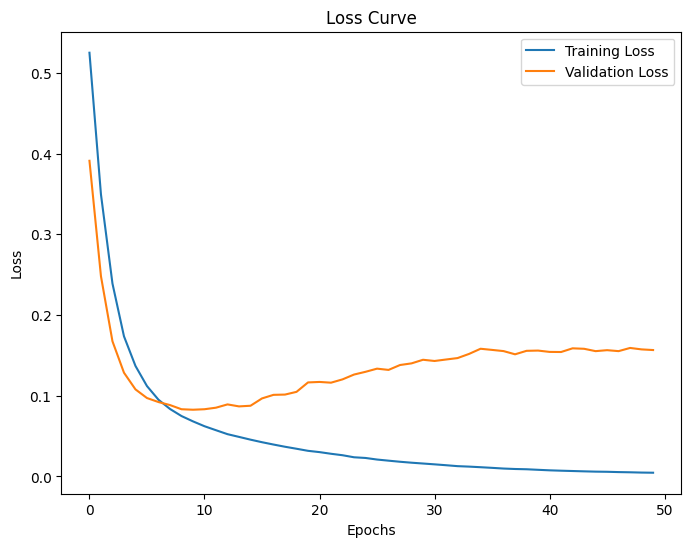

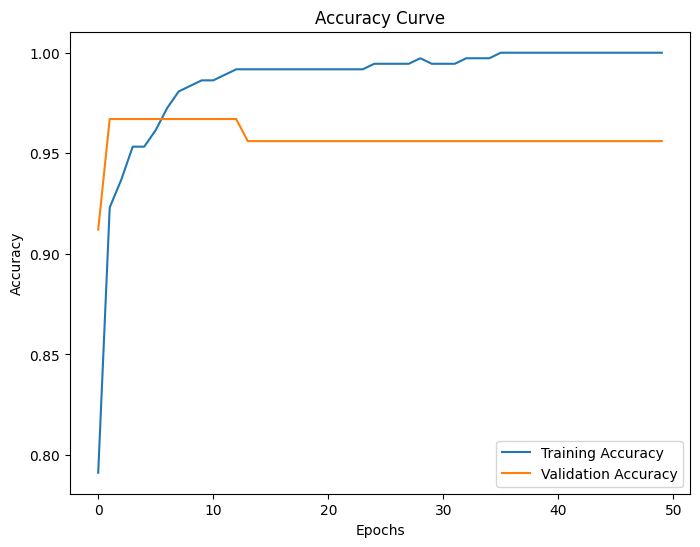

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
評価データ先頭5件の予測値：[0.6915 0.9997 0.9999 0.     1.    ]
評価データ先頭5件の正解値：[0 1 1 0 1]
訓練データの混同行列:
[[173   3]
 [  1 278]]
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9976 - loss: 0.0121 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9610 - loss: 0.1293
訓練 Loss: 0.0348, Accuracy: 0.9912
評価 Loss: 0.1144, Accuracy: 0.9649


In [9]:
import numpy as np
import pandas as pd

#手順1. データの読み込み
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
X = data.data
y = data.target

#手順2.データの前処理（分割と標準化）
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)
sc = StandardScaler()
X_train = sc.fit_transform(X_train) #X_trainで基準を作り標準化
X_test = sc.transform(X_test) #基準に従って標準化

#手順3. ニューラルネットワークモデルの構築
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam
model = Sequential([
    Input(shape=X_train.shape[1:]),   # 入力層（自動的にshape=(30,)を設定）
    Dense(60, activation="relu"),     # 隠れ層1（ノード数: 60）
    Dense(30, activation="relu"),     # 隠れ層2（ノード数: 30）
    Dense(1, activation="sigmoid")    # 出力層（ノード数: 1, sigmoid活性化関数）
])

model.compile(optimizer=Adam(learning_rate=0.001), #学習率を設定
    loss="binary_crossentropy", #二値分類の損失関数
    metrics=["accuracy"]) #評価の指標は正解率

#手順4. モデルの訓練
history = model.fit(X_train, y_train, #訓練データ
    epochs=50, #繰り返し学習する回数(エポック数)
    batch_size=32, #バッチサイズ、大きくすると計算が早いがメモリ必要
    validation_split=0.2,  #評価用のデータを2割とする
    verbose=1) #計算結果はエポックごとに表示する

#学習曲線の可視化
#損失値の推移
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.title("Loss Curve")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()
plt.close()

#正解率の推移
plt.figure(figsize=(8, 6))
plt.plot(history.history["accuracy"], label="Training Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.title("Accuracy Curve")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()
plt.close()

#手順5. モデルで予測
y_train_pred = model.predict(X_train) #訓練データを使って予測
#出力層をsigmoidを指定したため、出力は確率→ラベルに変換
y_train_pred_class = np.where(y_train_pred > 0.5, 1, 0)
y_test_pred = model.predict(X_test)
y_test_pred_class = np.where(y_test_pred > 0.5, 1, 0)
print(f"評価データ先頭5件の予測値：{np.round(y_test_pred[:5].flatten(),4)}")
print(f"評価データ先頭5件の正解値：{y_test[:5]}")

#手順6. モデルの評価
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train, y_train_pred_class)
print("訓練データの混同行列:")
print(cm)
loss_train, accuracy_train = model.evaluate(X_train, y_train)
loss_test, accuracy_test = model.evaluate(X_test, y_test)
print(f"訓練 Loss: {loss_train:.4f}, Accuracy: {accuracy_train:.4f}")
print(f"評価 Loss: {loss_test:.4f}, Accuracy: {accuracy_test:.4f}")


##12.4 マルチクラス分類問題

先頭5件のラベルデータ: [0 1 2 3 4]
先頭5件のOne-Hotエンコーディング結果:
[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]
Epoch 1/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.2765 - loss: 2.1694 - val_accuracy: 0.5660 - val_loss: 1.5835
Epoch 2/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6500 - loss: 1.3200 - val_accuracy: 0.8611 - val_loss: 0.7354
Epoch 3/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9111 - loss: 0.5642 - val_accuracy: 0.9097 - val_loss: 0.3577
Epoch 4/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9276 - loss: 0.3024 - val_accuracy: 0.9410 - val_loss: 0.2287
Epoch 5/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9615 - loss: 0.1769 - val_accuracy: 0.9444 - val_loss: 0.1851
Epoch 6/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9631 - loss: 0.1408 - val_accuracy: 0.9549 - val_loss: 0.1435
Epoch 7/50
36/36 ━━━━━━━━━━━

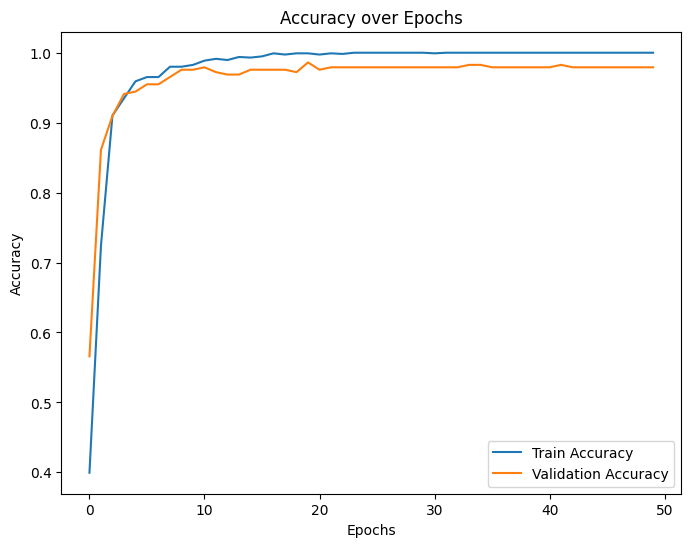

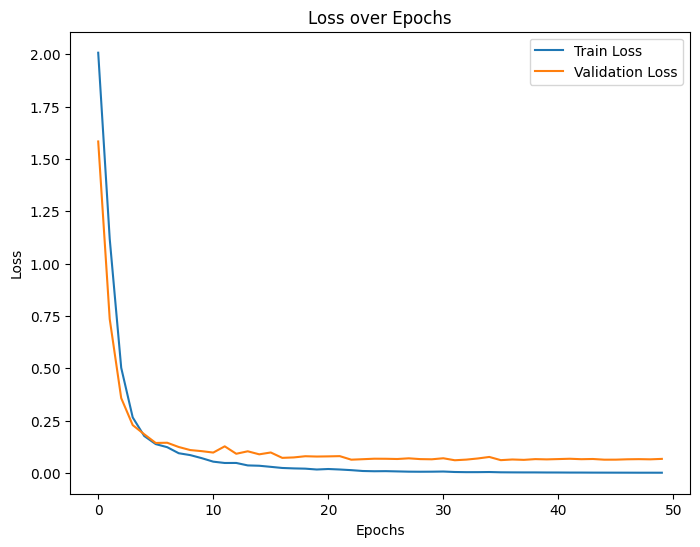

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
先頭5件の予測結果(確率):
[[0.     0.     0.     0.     0.     0.     0.     0.     0.     1.    ]
 [0.     1.     0.     0.     0.     0.     0.     0.     0.     0.    ]
 [0.     0.8557 0.     0.     0.1378 0.     0.     0.     0.0065 0.    ]
 [0.     0.     0.     0.9979 0.     0.     0.     0.     0.0007 0.0014]
 [0.     0.705  0.0003 0.     0.0015 0.     0.     0.0309 0.2621 0.0001]]
先頭5件の予測結果(クラスラベル): 
[[0.69151354]
 [0.9997261 ]
 [0.9999288 ]
 [0.00001883]
 [0.9999597 ]]
評価データを予測した時の混同行列:
[[30  0  0  0  0  0  0  0  0  0]
 [ 0 37  0  0  0  0  0  0  0  0]
 [ 0  1 37  0  0  0  0  0  0  0]
 [ 0  0  2 33  0  0  0  0  0  2]
 [ 0  0  0  0 38  0  0  0  0  0]
 [ 0  0  0  0  0 44  0  0  0  1]
 [ 0  1  0  0  0  0 41  0  0  0]
 [ 0  0  0  0  1  0  0 24  0  1]
 [ 0  3  0  0  1  0  0  0 29  1]
 [ 0  0  0  0  0  0  0  0  0 33]]
訓練データ loss:0.0145 Accuracy: 0.996
評価データ loss:0.1750  Accuracy: 0.961


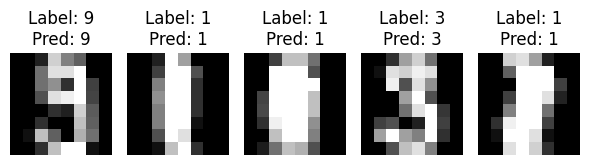

In [10]:
import numpy as np
import pandas as pd

#手順1 データのロード
from sklearn.datasets import load_digits
digits = load_digits()
X = digits.data  # 特徴量 (64次元ベクトル: 8x8画像のピクセル値)
y = digits.target  # ラベル (0～9)

#手順2 データの前処理
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
# 0～16のデータを正規化 (0～1の範囲にスケール)
sc = MinMaxScaler()
X_scaled = sc.fit_transform(X)

#0～9のラベルデータをOne-Hotエンコーディング
#sphare_output=Falseで結果をndarray形式となる
encoder = OneHotEncoder(sparse_output=False)
#y.reshape(-1, 1)で10列の2次元データとしてエンコーディング
y_onehot = encoder.fit_transform(y.reshape(-1, 1))
print(f"先頭5件のラベルデータ: {y[:5]}")
print(f"先頭5件のOne-Hotエンコーディング結果:\n{y_onehot[:5]}")

#データの分割 (訓練データとテストデータ)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_onehot, test_size=0.2, random_state=13)

#手順3 モデルの構築
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input,Dense
from tensorflow.keras.optimizers import Adam
model = Sequential([
    Input(shape=(X_train.shape[1],)), #入力層64ユニット
    Dense(128, activation="relu"),  # 隠れ層１(128ユニット)
    Dense(64, activation="relu"),  # 隠れ層 (64ユニット)
    Dense(32, activation="relu"),  # 隠れ層 (32ユニット)
    Dense(10, activation="softmax")  # 出力層 (10ユニット: 各クラスの確率)
])

# モデルのコンパイル
model.compile(optimizer=Adam(learning_rate=0.001),
              loss="categorical_crossentropy",
              metrics=["accuracy"])

#手順4 モデルの学習
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)
# 学習曲線のプロット
import matplotlib.pyplot as plt
#正解率
plt.figure(figsize=(8, 6))
plt.plot(history.history["accuracy"], label="Train Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.title("Accuracy over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()
plt.close()
#損失関数
plt.figure(figsize=(8, 6))
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.title("Loss over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()
plt.close()

#手順5 モデルで予測
y_test_pred_prob = model.predict(X_test)
np.set_printoptions(suppress=True) #指数表示を抑止
print(f"先頭5件の予測結果(確率):\n{np.round(y_test_pred_prob[:5],4)}")
y_test_pred_labels = np.argmax(y_test_pred_prob, axis=1)
print(f"先頭5件の予測結果(クラスラベル): \n{y_test_pred[:5]}")

#手順6 モデルの評価
from sklearn.metrics import accuracy_score,confusion_matrix
#ワンホットで表されたy_testから1次元データy_test_labelsへ
y_test_labels = np.argmax(y_test, axis=1)
cm = confusion_matrix(y_test_labels, y_test_pred_labels)
print(f"評価データを予測した時の混同行列:\n{cm}")
train_loss, train_accuracy = model.evaluate(X_train, y_train, verbose=0)
print(f"訓練データ loss:{train_loss:.4f} Accuracy: {train_accuracy:.3f}")
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"評価データ loss:{test_loss:.4f}  Accuracy: {test_accuracy:.3f}")


# 数字画像の可視化
def plot_digits(images, labels, predictions=None, n=5):
    plt.figure(figsize=(6, 4))
    for i in range(n):
        plt.subplot(1, n, i + 1)
        plt.imshow(images[i].reshape(8, 8), cmap="gray")
        if predictions is None:
            plt.title(f"Label: {labels[i]}")
        else:
            plt.title(f"Label: {labels[i]}\nPred: {predictions[i]}")
        plt.axis("off")
    plt.tight_layout()
    plt.show()

# テストデータから予測
#y_pred = np.argmax(model.predict(X_test), axis=1)

# テストデータの一部をプロット
plot_digits(X_test[:5], y_test_labels[:5], predictions=y_test_pred_labels[:5])

